<a href="https://colab.research.google.com/github/Tansiv/ML-CSE475/blob/main/DT_RF2_UPDATED_LAb_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Basic data manipulation and visualization
!pip install numpy pandas matplotlib seaborn

# Machine learning libraries
!pip install scikit-learn

# Google Drive integration for Colab
!pip install google-colab

# OpenCV for image processing
!pip install opencv-python

# If you encounter any issues with `opencv-python`, try installing `opencv-python-headless`
# !pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00


In [7]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import random
from google.colab import drive

In [8]:
# Mount Google Drive
drive.mount('/content/drive')

# Load Dataset
dataset_path = '/content/drive/MyDrive/ML-LAB/LAB-1/MangoLeafBD Dataset'
images = []
labels = []

for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (64, 64))  #I use 64,64 & 128, 128. in this 64,64 it decrease the accuracy and image resolution

                images.append(image)
                labels.append(label)



images = np.array(images)
labels = np.array(labels)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-d3e12e166e70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette="Set3")  # Random palette not necessary for reproducibility


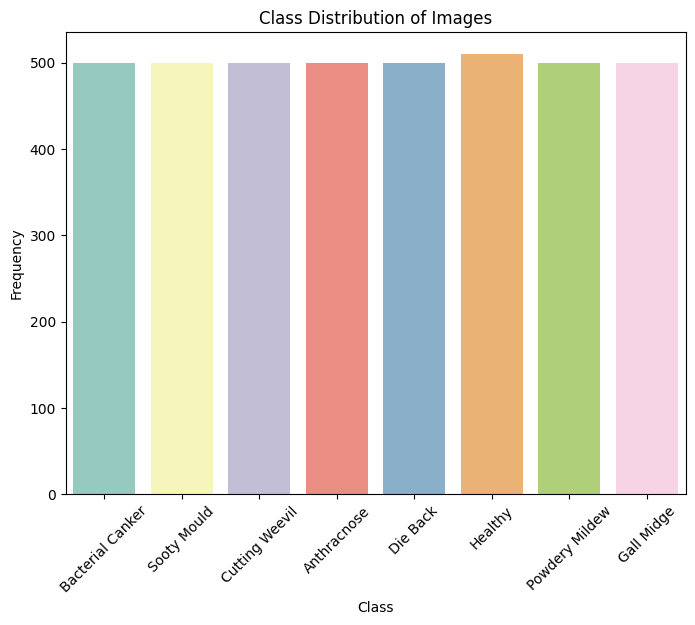

In [9]:
# Display Class Distribution Plot
plt.figure(figsize=(8, 6))
sns.countplot(x=labels, palette="Set3")
plt.title("Class Distribution of Images")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Each bar show a class and the number of images for that class, with frequency  around 500 images per class.
**bold text**

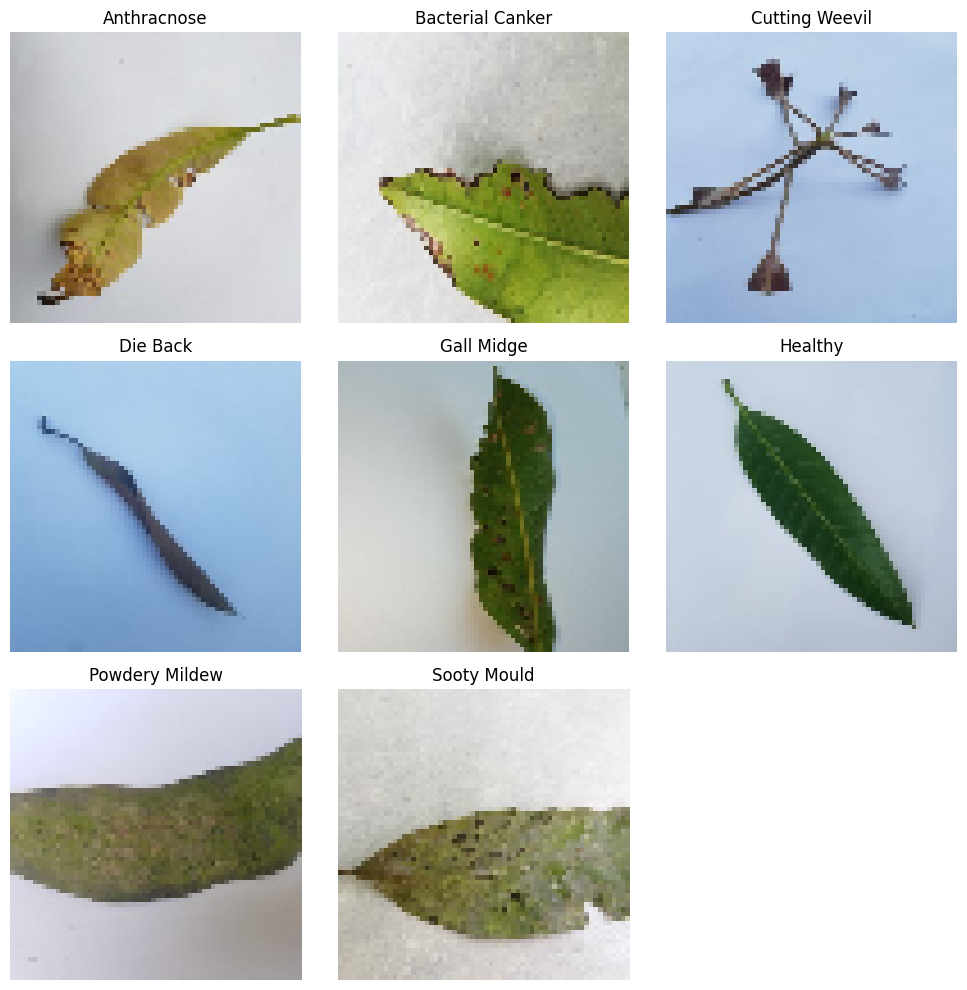

In [10]:
# Display Sample Images by Class
unique_labels = np.unique(labels)
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    label_indices = np.where(labels == label)[0]
    random_index = np.random.choice(label_indices)
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[random_index], cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()


This part show the a random **sample** image of each class of dataset. there are 8 class of dataset

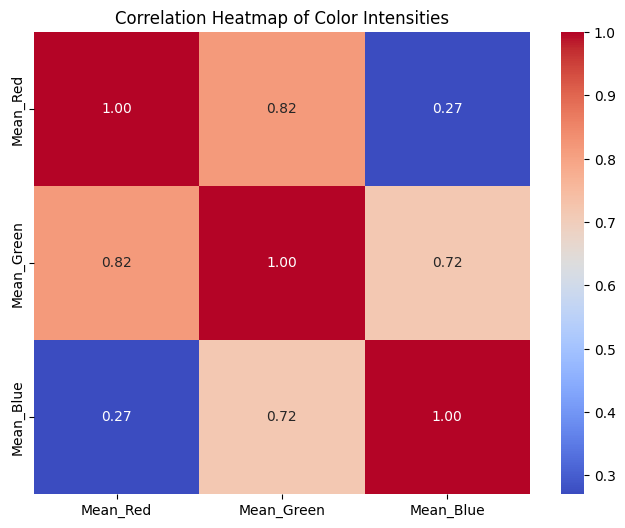

In [11]:
# Calculate mean color intensities for correlation heatmap
mean_red = [np.mean(img[:, :, 2]) for img in images]
mean_green = [np.mean(img[:, :, 1]) for img in images]
mean_blue = [np.mean(img[:, :, 0]) for img in images]
color_intensity_df = pd.DataFrame({'Mean_Red': mean_red, 'Mean_Green': mean_green, 'Mean_Blue': mean_blue})

# Plot and display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(color_intensity_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Color Intensities")
plt.show()


The heatmap shows the correlations between color intensities or the mean values of red, green, and blue. Strong positive correlations in between red-green that 0.82 and green-blue is 0.72, also red-blue shows a weak correlation of 0.27.

In [12]:

# Encode labels and prepare data for training
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Flatten images and split into training and testing sets
images_flattened = images.reshape(images.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels_encoded, test_size=0.2, random_state=42)

We used a level encoder for each level of the dataset. like [Anthracnose=0, Bacterial Canker = 1...... ]. images_flattened is working as converting the 3D images to 1D where[0] represent the number of images in the dataset and [-1] is reshaping the images.We split the the dataset for train and test the model, where test data is 20% of the actual dataset.

In [13]:
# Function to plot learning curve
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-Validation Score")
    plt.xlabel("Training Samples")
    plt.ylabel("Score")
    plt.title(title)
    plt.legend(loc="best")
    plt.show()


This  show the learning curve of  machine learning models. It plots the model’s performance on both training and cross-validation data. This helps to evaluate the the model generalizes, detect overfitting or underfitting.

Decision Tree Accuracy: 0.6770573566084788
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       103
           1       0.76      0.74      0.75       123
           2       0.88      0.96      0.92       103
           3       0.82      0.83      0.83       100
           4       0.51      0.48      0.49        94
           5       0.59      0.58      0.59        89
           6       0.64      0.64      0.64       102
           7       0.41      0.44      0.43        88

    accuracy                           0.68       802
   macro avg       0.67      0.67      0.67       802
weighted avg       0.68      0.68      0.68       802



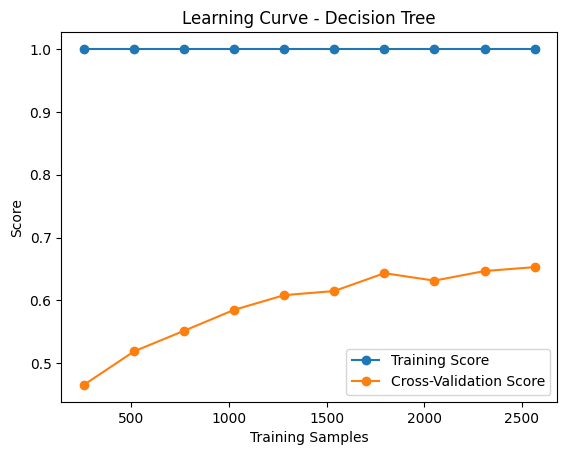

In [14]:

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(dt_report)

# Plot learning curve for Decision Tree
plot_learning_curve(dt_model, X_train, y_train, "Learning Curve - Decision Tree")


The learning curve shows that the model performence changes based on the training data. The Blue line show the model performence on the traing data and the Orange is cross-validation score of the model on validation data. it shows that the model is overfitting.

Decision Tree Accuracy: 0.6708229426433915
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       103
           1       0.83      0.74      0.78       123
           2       0.88      0.96      0.92       103
           3       0.81      0.80      0.80       100
           4       0.40      0.53      0.45        94
           5       0.61      0.48      0.54        89
           6       0.63      0.66      0.64       102
           7       0.48      0.45      0.47        88

    accuracy                           0.67       802
   macro avg       0.67      0.66      0.66       802
weighted avg       0.68      0.67      0.67       802



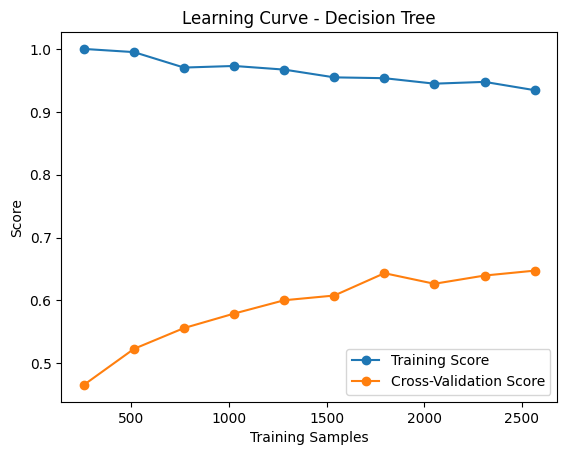

In [18]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(dt_report)

# Plot learning curve for Decision Tree
plot_learning_curve(dt_model, X_train, y_train, "Learning Curve - Decision Tree")

Random Forest Accuracy: 0.8778054862842892
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       103
           1       0.90      0.90      0.90       123
           2       1.00      1.00      1.00       103
           3       0.95      0.92      0.93       100
           4       0.74      0.77      0.75        94
           5       0.77      0.91      0.84        89
           6       0.91      0.85      0.88       102
           7       0.82      0.70      0.76        88

    accuracy                           0.88       802
   macro avg       0.88      0.87      0.87       802
weighted avg       0.88      0.88      0.88       802



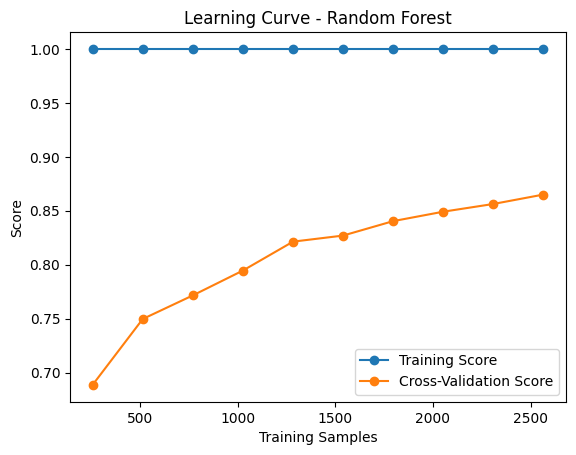

In [15]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(rf_report)

# Plot learning curve for Random Forest
plot_learning_curve(rf_model, X_train, y_train, "Learning Curve - Random Forest")

It is same as Decison tree like (Blue and Orange ) but this shows The cross-validation score is improving as the training sample size increases. it starts lower value like 0.7, it increasing  and approaches 0.85, showing that the model is well with more data.

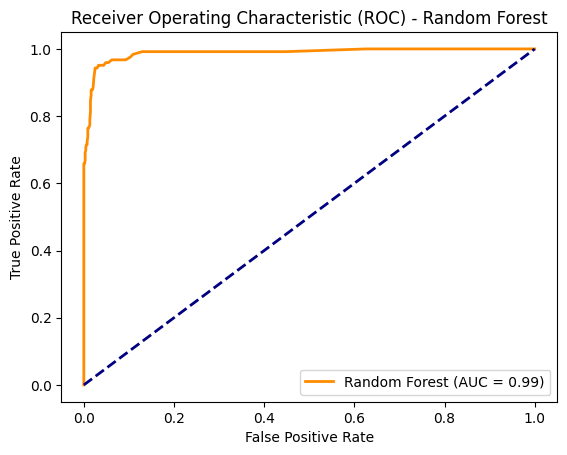

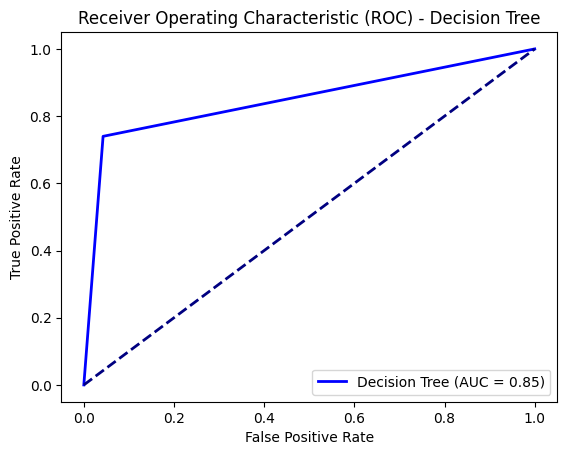

In [16]:
# ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf[:, 1], pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

y_pred_proba_dt = dt_model.predict_proba(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt[:, 1], pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()


This **y_pred_proba_rf** use the RF model to predict the probabilities of each class for the test data (x). **predict_proba** returns an array of the predicted probabilites of each class. This **fpr_rf** is the **False-possitive-rate** of random forest model and **True Positive Rate** (tpr_rf). This r**oc_auc_rf** give a short summery of the model performence.. This** plot([0, 1], [0, 1]** gives the baseline for comparison. And same for the decision tree.  


Random Forest (AUC = 0.99) and Decision Tree (AUC = 0.85)

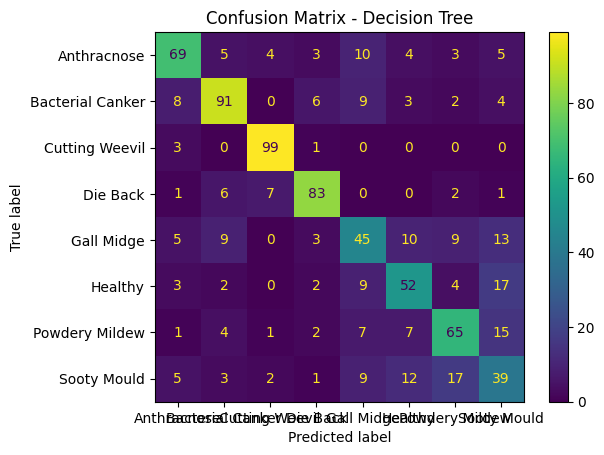

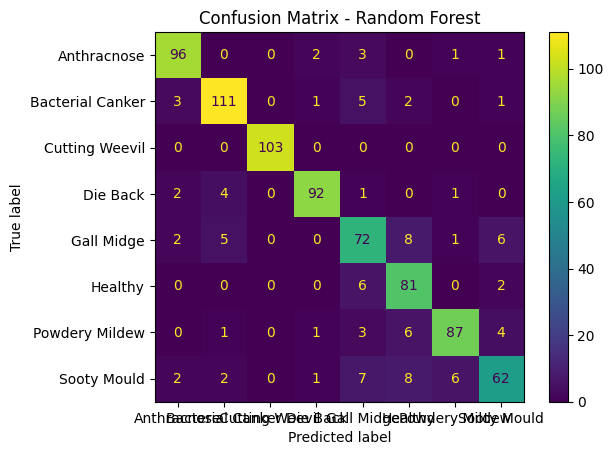

In [17]:
# Confusion Matrix for both models
# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=label_encoder.classes_)
disp_dt.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

The Decision Tree model struggles with accuracy,and  showing frequent misclassifications, especially for the "Gall Midge" and "Sooty Mould," with predictions  across the  multiple incorrect classes.But in the Random Forest model performs much better, with more correct classifications (higher diagonal counts) and fewer misclassifications. This model shows high accuracy for classes like "Bacterial Canker," "Healthy," and "Powdery Mildew," indicating improved the robustness and scope over to the Decision Tree methods